#Perkenalan
Nama: Fajar Reno Budiman

Batch: FTDS 006

#Studi Kasus


Kalkulus dan aljabar linear sebagai penerapan image processing dan mengeksplorasi hasil threshold gambar.

Pada studi kasus ini, saya menerapkan hasil perkalian matrix pada image array untuk melihat bagaimana perubahan magnitude yang terjadi apabila dikalikan matriks tertentu. 

Untuk mengetahui bagaimana edge di gambar muncul, perlu mengetahui nilai gradient magnitude dengan menurunkan terlebih dahulu nilai matriks yang sudah didapat kemudian mencari gradient magnitude dengan rumus sqrt(didx2 + didy2)

In [2]:
import numpy as  #untuk mengolah array dan operasi matriks maupun hasil turunan
import matplotlib.pyplot as plt #menampilkan hasil display data yang telah diolah
from PIL import Image #mengimport image agar bisa dibaca di program

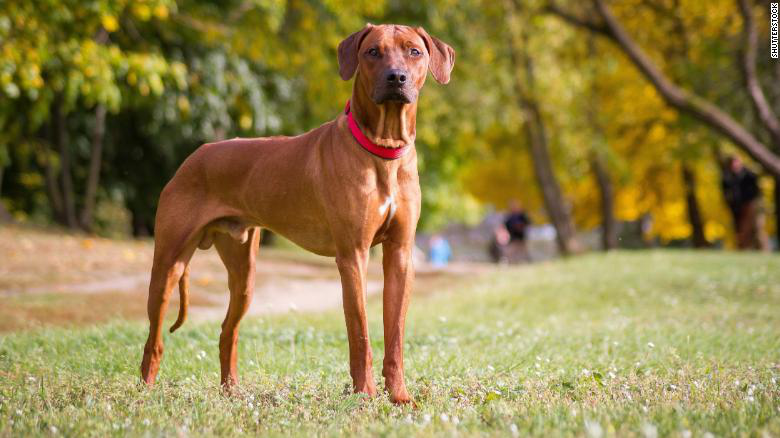

In [3]:
gbr = Image.open('brownie.jpg') #membuka gambar yang diimport dari file dengan code Image.open('<nama file>') (penggunaan PIL dalam membaca dan mengolah gambar)
gbr

In [4]:
gbr_array = np.asarray(gbr) #mengetahui array matriks pada gambar, gunakan np.asarray(<nama gambar di cell>)
gbr_array

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [5]:
gbr_array.shape #menentukan dimensi array

(438, 780, 3)

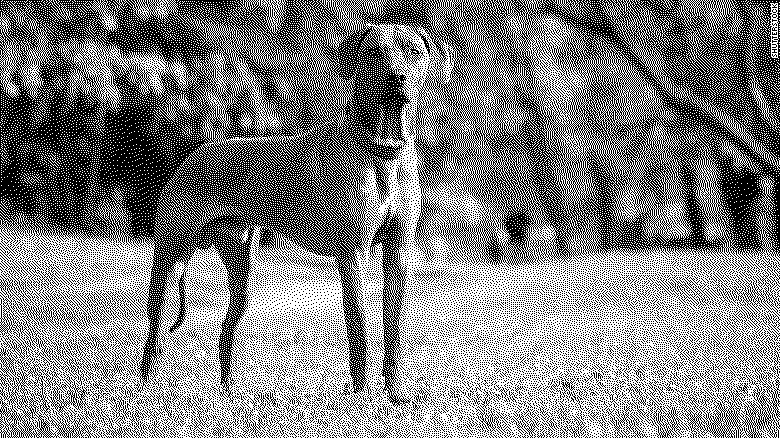

In [6]:
gbr_bw = gbr.convert('1') #mengubah warna gambar menjadi mode tertentu dengan kode <nama gambar>.convert('jenis peubah'). '1' untuk mengubah gambar menjadi mode black and white
gbr_bw

In [7]:
gbr_bw_array = np.asarray(gbr_bw) #menentukan array matriks pada gambar black and white
gbr_bw_array

array([[False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [ True, False,  True, ...,  True, False,  True],
       [ True, False,  True, ...,  True, False,  True],
       [ True, False,  True, ...,  True, False,  True]])

In [8]:
gbr_bw_array.shape #menentukan dimensi array

(438, 780)

Nilai array pada versi black and white tidak ditemukan nilai berupa angka pada matriks array tersebut karena hanya mendefinisikan warna hitam dan putih saja apakah true atau false hitam dan putih di gambar tersebut

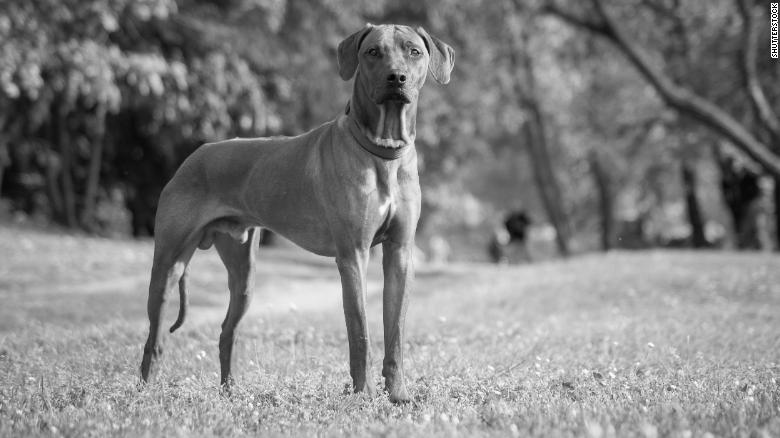

In [9]:
gbr_gray = gbr.convert('L') #mengubah warna gambar menjadi mode tertentu dengan kode <nama gambar>.convert('jenis peubah'). 'L' untuk mengubah gambar menjadi mode grayscale
gbr_gray

In [10]:
gbr_gray_array = np.asarray(gbr_gray) #melihat bentuk array pada gambar
gbr_gray_array

array([[ 85,  85,  83, ...,  40,  38,  51],
       [ 76,  76,  75, ...,  38,  56,  29],
       [ 64,  65,  65, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 136, 135, 131],
       [149, 142, 132, ..., 141, 139, 134],
       [149, 142, 131, ..., 146, 143, 136]], dtype=uint8)

In [11]:
gbr_gray_array. #mengetahui dimensi matriks pada gambar

(438, 780)

Terdapat perbedaan array matriks terhadap grayscale dan black and white, pada matriks array grayscale memiliki nilai matriks sedangkan pada matriks black and white hanya menampilkan nilai true dan false (angka di dalam matriks tidak tampil). Oleh karena itu, saya memutuskan untuk memilih tipe grayscale untuk memproses gambar dengan mencari gradient dan gradient magnitude

#Mencari Gradient dan Gradient Magnitude

##Menentukan Gradient Vector

In [12]:
didx, didy = np.gradient(gbr_gray_array) #mencari gradient vektor dengen kode np.gradient(<nama cell yang ingin dicari gradientnya>)

In [13]:
didx

array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
       [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
       [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
       ...,
       [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
       [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
       [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]])

In [14]:
didy

array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
       [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
       [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
       ...,
       [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
       [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
       [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])

In [15]:
dx, dy = np.gradient(gbr_gray) #mencari vektor gradient dengan kode np.gradient(<nama cell>)

In [16]:
dx #mengetahui vektor gradient terhadap sumbu x

array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
       [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
       [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
       ...,
       [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
       [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
       [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]])

In [17]:
dx.shape

(438, 780)

In [18]:
dy #mengetahui vektor gradient terhadap sumbu y

array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
       [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
       [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
       ...,
       [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
       [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
       [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])

In [19]:
dy.shape

(438, 780)

##Perkalian matriks

In [20]:
identity = np.identity(438) #identity dibuat 438 karena bentuk matriks yang akan saya kalikan berbentuk 438,780 agar bisa dikali dengan matriks identity
identity_ = 6*identity
identity_

array([[6., 0., 0., ..., 0., 0., 0.],
       [0., 6., 0., ..., 0., 0., 0.],
       [0., 0., 6., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 6., 0., 0.],
       [0., 0., 0., ..., 0., 6., 0.],
       [0., 0., 0., ..., 0., 0., 6.]])

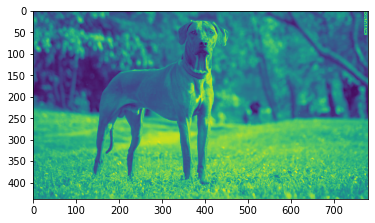

In [21]:
kali = identity_.dot(gbr_gray_array) #apabila gbr_gray_array.dot(identity_) matriks identity yang saya tadi buat harus np.identity(780)
plt.imshow(kali)

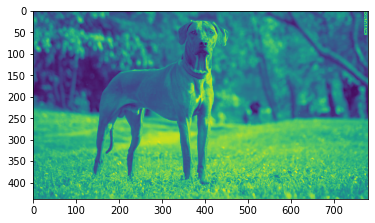

In [22]:
plt.imshow(gbr_gray_array)

Secara garis besar, hasil tampilan gambar antara grayscale biasa dengan grayscale yang dikali dengan 6 kali identitas sama saja.

##Mencari gradient gambar yang sudah dikali matriks

In [23]:
ddx, ddy = np.gradient(kali) #mencari gradient pada array yang sudah dikali matriks lainnya

In [24]:
ddx

array([[ -54.,  -54.,  -48., ...,  -12.,  108., -132.],
       [ -63.,  -60.,  -54., ...,   24.,   -6.,   27.],
       [ -54.,  -54.,  -48., ...,  645.,  -84.,  120.],
       ...,
       [  -3.,  -12.,  -15., ...,   12.,    9.,    6.],
       [  -3.,   -6.,   -9., ...,   30.,   24.,   15.],
       [   0.,    0.,   -6., ...,   30.,   24.,   12.]])

In [25]:
ddy

array([[   0.,   -6.,  -15., ...,   -9.,   33.,   78.],
       [   0.,   -3.,   -6., ...,   36.,  -27., -162.],
       [   6.,    3.,    3., ...,  -18.,   36.,  144.],
       ...,
       [ -36.,  -48.,  -57., ...,    6.,  -15.,  -24.],
       [ -42.,  -51.,  -51., ...,    3.,  -21.,  -30.],
       [ -42.,  -54.,  -54., ...,   -3.,  -30.,  -42.]])

Terdapat perbedaan nilai matrix antara gradient gambar yang hanya di array dibandingkan dengan gambar yang dikali dengan 6 kalinya matriks identitas

##Menentukan gradient magnitude 

In [27]:
#mencari gradient magnitude pada gambar dengan menggunakan rumus ((dI/dx)^2 + (dI/dy)^2)^(1/2)
mgn = np.sqrt(didx**2 + didy**2) # menggunakan sqrt sebagai bentuk root square
mgn #menampilkan array dari gradient magnitude

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

In [28]:
mgn.min()

0.0

In [29]:
mgn.max()

179.60512242138307

In [30]:
mgn_ = np.sqrt(ddx**2 + ddy**2) #menentukan gradient magnitude pada gambar yang matriksnya sudah dikali dengan 6*Identitas
mgn_

array([[ 54.        ,  54.33231083,  50.28916384, ...,  15.        ,
        112.92918135, 153.32318807],
       [ 63.        ,  60.07495318,  54.33231083, ...,  43.26661531,
         27.65863337, 164.23458832],
       [ 54.33231083,  54.08326913,  48.09365863, ..., 645.25111391,
         91.38927727, 187.44599222],
       ...,
       [ 36.12478374,  49.47726751,  58.94064811, ...,  13.41640786,
         17.49285568,  24.73863375],
       [ 42.10700654,  51.35172831,  51.7880295 , ...,  30.14962686,
         31.89043744,  33.54101966],
       [ 42.        ,  54.        ,  54.33231083, ...,  30.14962686,
         38.41874542,  43.68065934]])

In [42]:
mgn_.max()

1077.6307345282985

Gradient magnitude maksimal pada image biasa sebesar sebesar 179.60512242138307 sedangkan pada image yang sudah dikali matrix sebesar 1077.6307345282985. Ternyata setelah dikali matrix terdapat perubahan nilai magnitude yang cukup signifikan dengan gambar biasa. Terdapat magnitude melebihi angka threshold (>30), artinya edge pada gambar terdeteksi

##Display Image Based on Gradient Magnitude

Melihat bagaimana proses transisi edge yang semakin menghilang jika threshold semakin tinggi

###Magnitude < Score
Melihat hasil edge pada magnitude dengan batas di bawah batasnya

In [31]:
mgn_30 = np.where(mgn < 30, 255, 0)
mgn_40 = np.where(mgn < 40, 255, 0)
mgn_50 = np.where(mgn < 50, 255, 0)
mgn_60 = np.where(mgn < 60, 255, 0)
mgn_70 = np.where(mgn < 70, 255, 0)
mgn_80 = np.where(mgn < 80, 255, 0)
mgn_90 = np.where(mgn < 90, 255,0)
mgn_100 = np.where(mgn < 100, 255,0)
mgn_110 = np.where(mgn < 110, 255,0)
mgn_120 = np.where(mgn < 120, 255, 0)
mgn_130 = np.where(mgn < 130, 255,0)
mgn_140 = np.where(mgn < 140, 255,0)
mgn_150 = np.where(mgn < 150, 255, 0)
mgn_160 = np.where(mgn < 160, 255,0)
mgn_170 = np.where(mgn < 170, 255,0)
mgn_179 = np.where(mgn < 179, 255, 0)
mgn_180 = np.where(mgn < 180, 255, 0)

Text(0.5, 1.0, 'magnitude < 100')

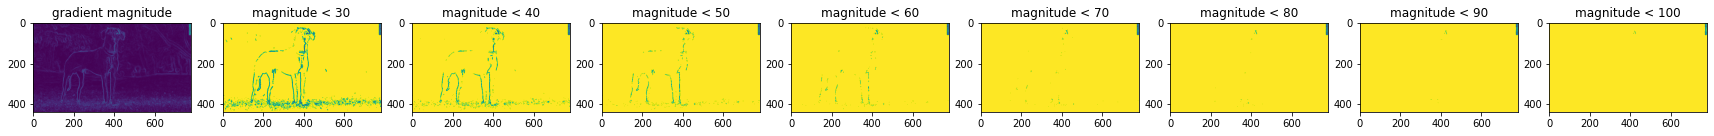

In [32]:
fig, ax =plt.subplots(ncols = 9 , figsize=(30,30)) #terdapat 9 plot, ncols harus 9
ax[0].imshow(mgn)
ax[0].set_title("gradient magnitude")
ax[1].imshow(mgn_30)
ax[1].set_title("magnitude < 30")
ax[2].imshow(mgn_40)
ax[2].set_title("magnitude < 40")
ax[3].imshow(mgn_50)
ax[3].set_title("magnitude < 50")
ax[4].imshow(mgn_60)
ax[4].set_title("magnitude < 60")
ax[5].imshow(mgn_70)
ax[5].set_title("magnitude < 70")
ax[6].imshow(mgn_80)
ax[6].set_title("magnitude < 80")
ax[7].imshow(mgn_90)
ax[7].set_title("magnitude < 90")
ax[8].imshow(mgn_100)
ax[8].set_title("magnitude < 100")

Text(0.5, 1.0, 'magnitude < 180')

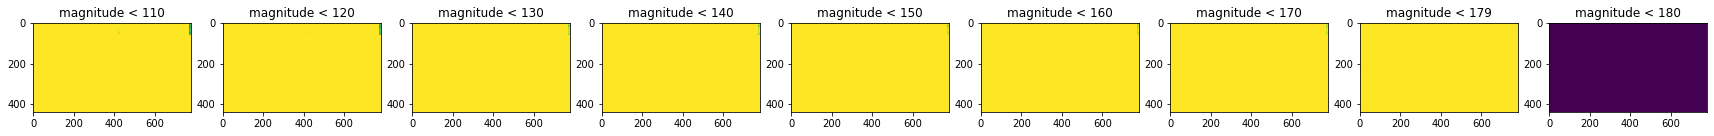

In [33]:
fig, ax =plt.subplots(ncols = 9 , figsize=(30,30))
ax[0].imshow(mgn_110)
ax[0].set_title("magnitude < 110")
ax[1].imshow(mgn_120)
ax[1].set_title("magnitude < 120")
ax[2].imshow(mgn_130)
ax[2].set_title("magnitude < 130")
ax[3].imshow(mgn_140)
ax[3].set_title("magnitude < 140")
ax[4].imshow(mgn_150)
ax[4].set_title("magnitude < 150")
ax[5].imshow(mgn_160)
ax[5].set_title("magnitude < 160")
ax[6].imshow(mgn_170)
ax[6].set_title("magnitude < 170")
ax[7].imshow(mgn_179)
ax[7].set_title("magnitude < 179")
ax[8].imshow(mgn_180)
ax[8].set_title("magnitude < 180")

###Magnitude > Score
Melihat hasil edge pada magnitude dengan batas di atas batasnya

In [34]:
mgn30 = np.where(mgn > 30, 255, 0)
mgn40 = np.where(mgn > 40, 255, 0)
mgn50 = np.where(mgn > 50, 255, 0)
mgn60 = np.where(mgn > 60, 255, 0)
mgn70 = np.where(mgn > 70, 255, 0)
mgn80 = np.where(mgn > 80, 255, 0)
mgn90 = np.where(mgn > 90, 255,0)
mgn100 = np.where(mgn > 100, 255,0)
mgn110 = np.where(mgn > 110, 255,0)
mgn120 = np.where(mgn > 120, 255, 0)
mgn130 = np.where(mgn > 130, 255,0)
mgn140 = np.where(mgn > 140, 255,0)
mgn150 = np.where(mgn > 150, 255, 0)
mgn160 = np.where(mgn > 160, 255,0)
mgn170 = np.where(mgn > 170, 255,0)
mgn179 = np.where(mgn > 179, 255, 0)
mgn180 = np.where(mgn > 180, 255, 0)

Text(0.5, 1.0, 'magnitude > 100')

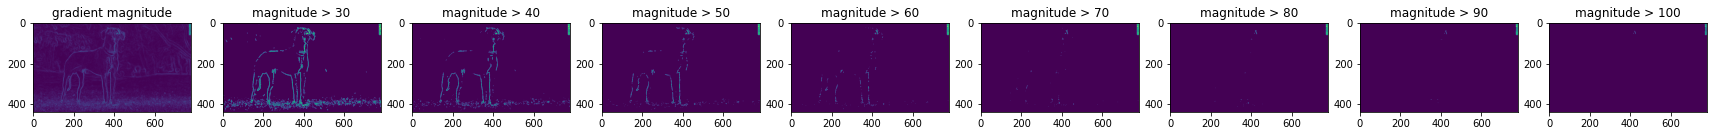

In [41]:
fig, ax =plt.subplots(ncols = 9 , figsize=(30,30))
ax[0].imshow(mgn)
ax[0].set_title("gradient magnitude")
ax[1].imshow(mgn30)
ax[1].set_title("magnitude > 30")
ax[2].imshow(mgn40)
ax[2].set_title("magnitude > 40")
ax[3].imshow(mgn50)
ax[3].set_title("magnitude > 50")
ax[4].imshow(mgn60)
ax[4].set_title("magnitude > 60")
ax[5].imshow(mgn70)
ax[5].set_title("magnitude > 70")
ax[6].imshow(mgn80)
ax[6].set_title("magnitude > 80")
ax[7].imshow(mgn90)
ax[7].set_title("magnitude > 90")
ax[8].imshow(mgn100)
ax[8].set_title("magnitude > 100")

Text(0.5, 1.0, 'magnitude > 130')

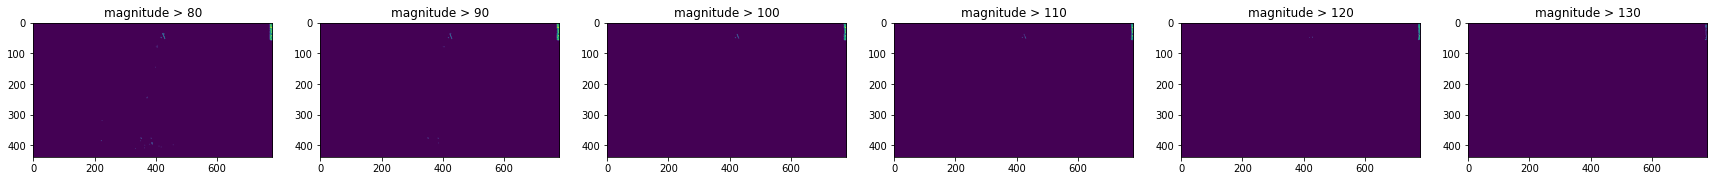

In [36]:
fig, ax =plt.subplots(ncols = 9 , figsize=(30,30))
ax[0].imshow(mgn110)
ax[0].set_title("magnitude > 110")
ax[1].imshow(mgn120)
ax[1].set_title("magnitude > 120")
ax[2].imshow(mgn130)
ax[2].set_title("magnitude > 130")
ax[3].imshow(mgn140)
ax[3].set_title("magnitude > 140")
ax[4].imshow(mgn150)
ax[4].set_title("magnitude > 150")
ax[5].imshow(mgn160)
ax[5].set_title("magnitude > 160")
ax[6].imshow(mgn170)
ax[6].set_title("magnitude > 170")
ax[7].imshow(mgn179)
ax[7].set_title("magnitude > 179")
ax[8].imshow(mgn180)
ax[8].set_title("magnitude > 180")

In [38]:
#menampilkan hasil magnitude pada image yang sudah dikali matrix
mgn__30 = np.where(mgn_ > 30, 255, 0)
mgn__50 = np.where(mgn_ > 50, 255, 0)

Text(0.5, 1.0, 'magnitude > 50 ddx ddy')

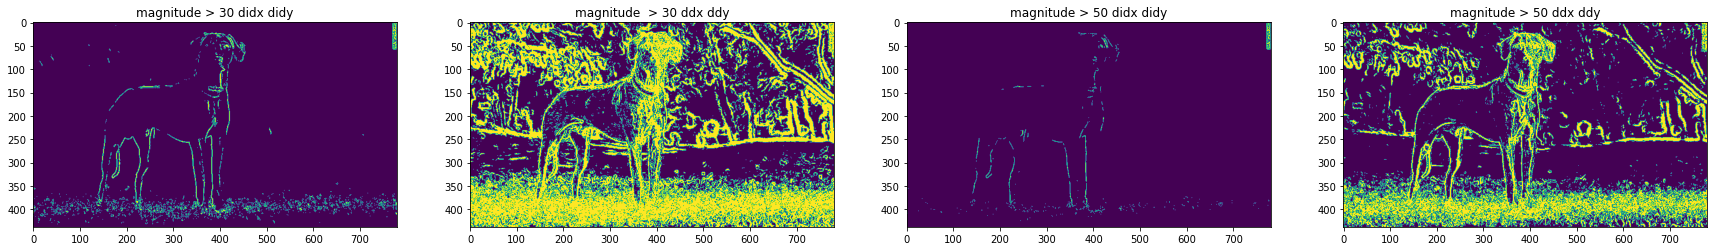

In [39]:
#Membandingkan hasil threshold antara grayscale (didx didy) dengan image yang sudah dikalikan dengan matriks lainnya (ddx ddy)
fig, ax =plt.subplots(ncols = 4 , figsize=(30,30))
ax[0].imshow(mgn30)
ax[0].set_title("magnitude > 30 didx didy")
ax[1].imshow(mgn__30)
ax[1].set_title("magnitude  > 30 ddx ddy")
ax[2].imshow(mgn50)
ax[2].set_title("magnitude > 50 didx didy")
ax[3].imshow(mgn__50)
ax[3].set_title("magnitude > 50 ddx ddy")

Magnitude yang ditampilkan setelah dikali dengan 6*Identity menghasilkan edge yang lebih jelas dan detail dibandingkan dengan magnitude normalnya

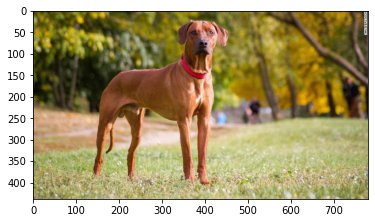

In [40]:
plt.imshow(gbr)

#Kesimpulan

Berdasarkan hasil analisa gradient magnitude dan threshold pada gambar, bahwa:

###1. Parameter magnitude yang diukur akan berpengaruh terhadap hasil layout gambarnya.
Hal ini dapat dilihat perbedaan gambar apabila magnitude dengan batas "<" dan ">". Edge yang ditampilkan dengan arah threshold "<" menghasilkan kombinasi warna kuning-hijau-biru dengan dominan warna kuning dan edge yang ditampilkan warna hijau-biru. Sedangkan edge yang ditampilkan dengan arah threshold ">" menghasilkan kombinasi warna ungu-kuning-hijau-biru dengan dominan warna ungu dan edge yang ditampilkan warna kuning-hijau-biru. Hal ini dapat disimpulkan bahwa mode warna yang akan mau kita pilih tergantung bagaimana arah batas thresholdnya. Apabila ingin melihat threshold dengan mode cerah dan outline yang lebih gelap gunakan parameter "<", namun apabila ingin melihat threshold dengan mode gelap dan outline edge yang cerah gunakan parameter ">". Oleh karena itu, pentingnya pemilihan parameter untuk menampilkan gambar yang bagaimana yang akan kita ingin tampilkan.

###2. Semakin besar nilai threshold, maka semakin tidak terlihat edge yang ditampilkan.
Hal ini dapat dilihat dari seluruh perbandingan nilai threshold sampai dengan nilai maksimumnya. Hal ini dapat disimpulkan bahwa ketika kita mengambil sebuah gambar tidak semua nilai pixel bernilai sama, hal ini dapat dilihat dengan pengecekkan matrix array pada gambar dengan besaran angka yang berbeda. Perbedaan besarnya angka di dalam matrix array mempengaruhi nilai edge pada threshold, semakin besar nilai pixel maka semakin jelas edge yang terlihat pada beberapa kondisi threshold.

###3. Layering dan fokus pada gambar mempengaruhi tebal atau tipisnya edge pada gambar
Seperti yang telah saya tampilkan pada akhir kode mengenai gambar tersebut terlihat bahwa pengambilan gambar lebih fokus kepada anjing dibanding dengan pohon di belakangnya (dapat dilihat dari plt.imshow(gbr)), oleh sebab itu edge yang dilihat berdasarkan threshold lebih tebal pada edge di anjing kemudian baru memudar. Tulisan copyright di pojok kanan atas membuktikan bahwa layering juga mempengaruhi tampilan edge terhadap nilai threshold. Dalam pemikiran saya, proses pengambilan gambar ini adalah mengambil foto dengan fokus ke anjing kemudian diberikan label copyright. Maka ketika kita membandingkan hasil threshold, tulisan copyright yang paling terakhir menghilang. Oleh karena itu, semakin layering berada di depan semakin tebal edge yang ditampilkan berdasarkan kondisi thresholdnya.

###4. perkalian matriks berdampak pada hasil threshold dan edge yang ditampilkan
Setelah saya mengkalikan matriks gambar biasa dengan matriks yang baru dibuat, pada kasus ini terdapat edge yang lebih detail dan lebih tajam dibandingkan dengan gambar sebelumnya. Hal ini dapat saya dapat simpulkan bahwa jelas atau tidaknya suatu gambar dipengaruhi oleh besarnya matriks pada gambar tersebut. Padahal apabila kita melihat hasil tampilan gambar biasa dengan gambar yang sudah dikalikan matriks menampilkan hasil yang sama, namun setelah ditelaah gradient magnitudenya memiliki hasil threshold dan edge yang sangat berbeda. Kemungkinan dengan perkalian bentuk matriks yang lain akan menghasilkan kualitas gambar tertentu yang ingin disampaikan

###5. Perkalian matriks dengan kelipatan matriks Identity tertentu akan semakin memperkuat edge pada gambar

###6. Membuktikan bahwa pixel berbentuk dot

Dapat dilihat pada transisi threshold bahwa edge semakin menghilang berarti di gambar tersebut terbentuk dari komponen dot. Karena jika komponen gambar berbentuk vektor ketika menghilang maka akan langsung hilang semua tanpa ada transisi kehilangan edge di gambar tersebut